In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [4]:
def linear(x, k, b):
    return k * x + b


def exponential(x, x0, k, b):
    return x0 * np.e ** (k * x) + b

In [52]:
data = pd.read_csv('Q(dP)[4mm].csv')
data = data.loc[data['Q'] != '?']
data = data.sort_values(by=['dl'])
P = data['dl'] * data['k'] * 9.8
Q = data['Q']

In [72]:
a, b = 0, 9
p = np.linspace(P[a:b].min(), P[a:b].max(), 300)
popt, pcov = curve_fit(linear, P[a:b], Q[a:b])

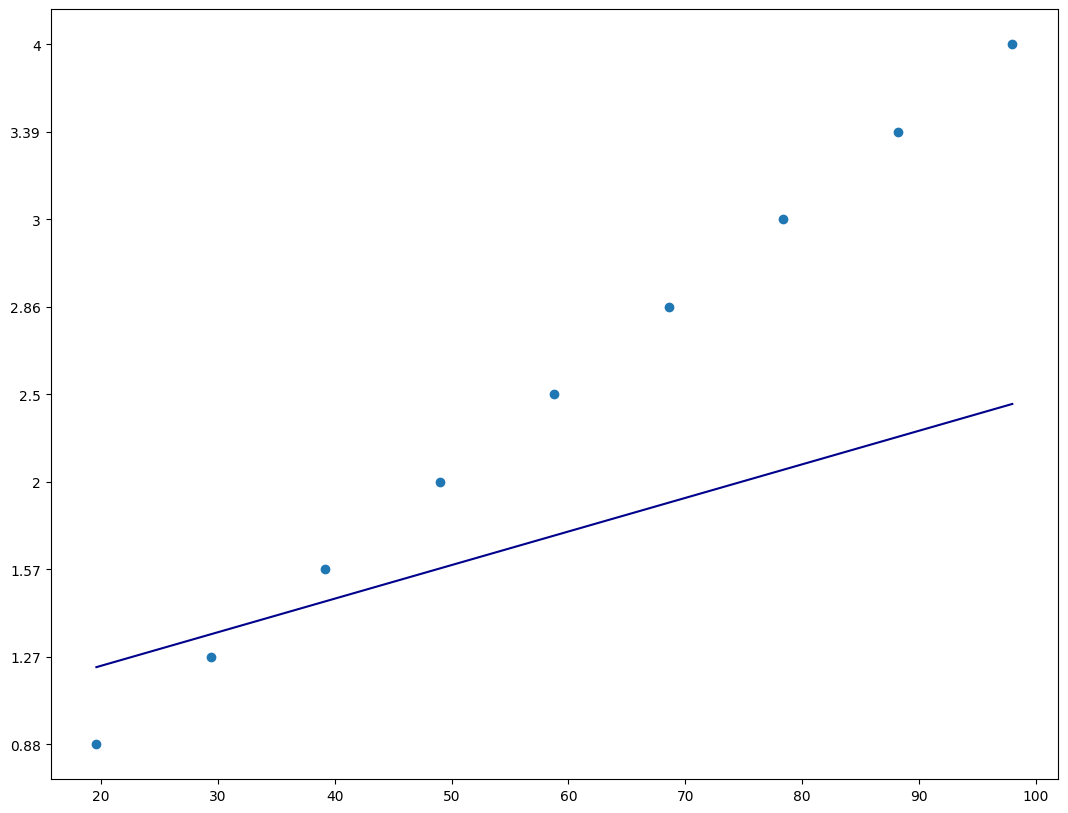

In [73]:
plt.figure(figsize=(13, 10))

plt.scatter(P[a:b], Q[a:b])
plt.plot(p, linear(p, *popt), color='darkblue')
plt.savefig('graphs\Q(dP)[4mm].png')